# Project work: A mini segmentation challenge

Imaging for the Life Sciences  
MSLS / CO4: Project work

**Student**: $\Rightarrow$  Guansheng Du    
**University**: $\Rightarrow$  ZHAW  
**Semester**: $\Rightarrow$  SS24   
**Date**: $\Rightarrow$  DATE OF SUBMISSION 



## Dataset 

[https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation](https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation)

<br><br><br>
## Table of contents
<!-- Unfortunately, the following does not always work correctly -->
* [1. Dataset](#sec_dataset)  
* [2. Preprocessing](#sec_preprocessing)  
* [3. Manual segmentation](#sec_manual_segmentation)  
* [4. Automated segmentation](#sec_automated_segmentation)  
* [5. Evaluation](#sec_evaluation)  
* [6. Discussion](#sec_discussion)  
* [*. Hints](#sec_hints)  


---

## Prerequisites / Setup

$\Rightarrow$  Special setup instructions, imports and configurations go here.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import nibabel as nib
import pydicom
import PIL

# Jupyter / IPython configuration:
# Automatically reload modules when modified
%load_ext autoreload
%autoreload 2

# Enable vectorized output (for nicer plots)
%config InlineBackend.figure_formats = ["svg"]

# Inline backend configuration
%matplotlib inline

# Enable this line if you want to use the interactive widgets
# It requires the ipympl package to be installed.
#%matplotlib widget

import sys
sys.path.insert(0, "../")
import tools

data_folder = '/home/gs/Desktop/SS24 CO4 Imaging for the Life Sciences/MRI_segmentation_data/raw/'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---


<a id='sec_dataset'></a>

## Dataset

$\Rightarrow$ Describe your dataset.

### Requirements:
* Dataset of at least 10 image samples
* The data set must not be larger than 200 MB. If your data is larger, please contact the tutor.
* Make sure you have the right to use the data and share it with others (check the usage license!)
* A structure of interest should be easily recognizable in these samples
* Avoid data with too much variation
* All students will use different datasets!


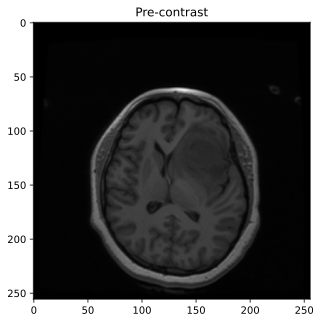

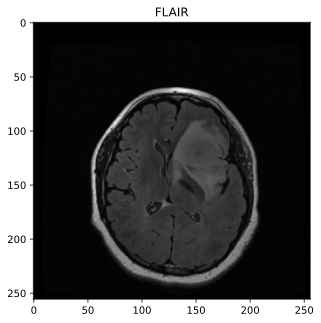

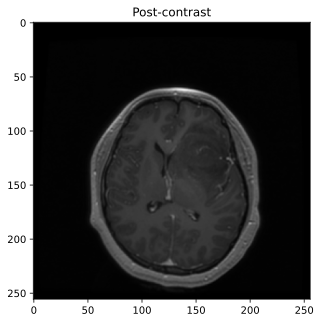

In [69]:
# Read in sample .tif image with pre-contrast and post-contrast channels 

image = PIL.Image.open(
    data_folder + "TCGA_HT_A61A_20000127_43.tif"
)

# Split the image into individual bands
channels = image.split()

# Access each channel individually
pre_contrast = channels[0]
FLAIR = channels[1]
post_contrast = channels[2]

# Display the pre-contrast channel
plt.figure(figsize=(5, 5))
plt.imshow(pre_contrast, cmap="gray")
plt.title("Pre-contrast")
plt.show()

# Display the FLAIR channel
plt.figure(figsize=(5, 5))
plt.imshow(FLAIR, cmap="gray")
plt.title("FLAIR")
plt.show()

# Display the post-contrast channel
plt.figure(figsize=(5, 5))
plt.imshow(post_contrast, cmap="gray")
plt.title("Post-contrast")
plt.show()

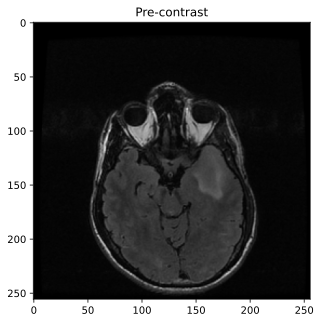

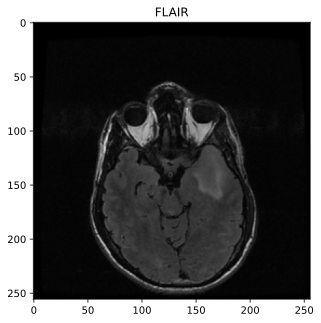

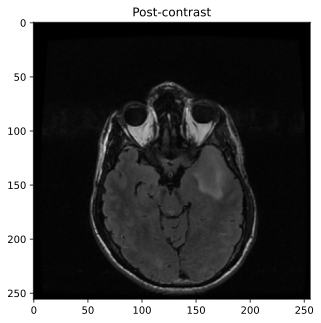

In [70]:
# Read in sample .tif image with pre-contrast and post-contrast channels

image = PIL.Image.open(
    data_folder + "TCGA_HT_A61B_19991127_34.tif"
)


# Split the image into individual bands
channels = image.split()

# Access each channel individually
pre_contrast = channels[0]
FLAIR = channels[1]
post_contrast = channels[2]

# Display the pre-contrast channel
plt.figure(figsize=(5, 5))
plt.imshow(pre_contrast, cmap="gray")
plt.title("Pre-contrast")
plt.show()

# Display the FLAIR channel
plt.figure(figsize=(5, 5))
plt.imshow(FLAIR, cmap="gray")
plt.title("FLAIR")
plt.show()

# Display the post-contrast channel
plt.figure(figsize=(5, 5))
plt.imshow(post_contrast, cmap="gray")
plt.title("Post-contrast")
plt.show()

---

<a id='sec_preprocessing'></a>

## Preprocessing

$\Rightarrow$ Describe the pre-processing that was required to complete the segmentation task.


### Goals:
* Choose a method that scales well for larger datasets
* Improve the datasets for easier processing

In [71]:
# Function to sort filenames in natural order
# Generated by AI

import re

def natural_sort(l):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split("([0-9]+)", key)]
    return sorted(l, key=alphanum_key)



In [72]:
import os
import pandas as pd

# Get a list of all .tif files in the data folder
tif_files = [f for f in os.listdir(data_folder) if f.endswith(".tif")]

# Usage:
tif_files = natural_sort(tif_files)
tif_files

['TCGA_CS_4941_19960909_1.tif',
 'TCGA_CS_4941_19960909_1_mask.tif',
 'TCGA_CS_4941_19960909_2.tif',
 'TCGA_CS_4941_19960909_2_mask.tif',
 'TCGA_CS_4941_19960909_3.tif',
 'TCGA_CS_4941_19960909_3_mask.tif',
 'TCGA_CS_4941_19960909_4.tif',
 'TCGA_CS_4941_19960909_4_mask.tif',
 'TCGA_CS_4941_19960909_5.tif',
 'TCGA_CS_4941_19960909_5_mask.tif',
 'TCGA_CS_4941_19960909_6.tif',
 'TCGA_CS_4941_19960909_6_mask.tif',
 'TCGA_CS_4941_19960909_7.tif',
 'TCGA_CS_4941_19960909_7_mask.tif',
 'TCGA_CS_4941_19960909_8.tif',
 'TCGA_CS_4941_19960909_8_mask.tif',
 'TCGA_CS_4941_19960909_9.tif',
 'TCGA_CS_4941_19960909_9_mask.tif',
 'TCGA_CS_4941_19960909_10.tif',
 'TCGA_CS_4941_19960909_10_mask.tif',
 'TCGA_CS_4941_19960909_11.tif',
 'TCGA_CS_4941_19960909_11_mask.tif',
 'TCGA_CS_4941_19960909_12.tif',
 'TCGA_CS_4941_19960909_12_mask.tif',
 'TCGA_CS_4941_19960909_13.tif',
 'TCGA_CS_4941_19960909_13_mask.tif',
 'TCGA_CS_4941_19960909_14.tif',
 'TCGA_CS_4941_19960909_14_mask.tif',
 'TCGA_CS_4941_19960909_

In [73]:
mask_files = [f for f in tif_files if "_mask" in f]
len(mask_files)

3929

In [74]:
image_files = [f for f in tif_files if "_mask" not in f]
len(image_files)


3929

In [75]:
# Create a DataFrame
df = pd.DataFrame({"image_file": image_files, "mask_file": mask_files})
df

,image_file,mask_file
0,TCGA_CS_4941_19960909_1.tif,TCGA_CS_4941_19960909_1_mask.tif
1,TCGA_CS_4941_19960909_2.tif,TCGA_CS_4941_19960909_2_mask.tif
2,TCGA_CS_4941_19960909_3.tif,TCGA_CS_4941_19960909_3_mask.tif
3,TCGA_CS_4941_19960909_4.tif,TCGA_CS_4941_19960909_4_mask.tif
4,TCGA_CS_4941_19960909_5.tif,TCGA_CS_4941_19960909_5_mask.tif
...,...,...
3924,TCGA_HT_A616_19991226_24.tif,TCGA_HT_A616_19991226_24_mask.tif
3925,TCGA_HT_A616_19991226_25.tif,TCGA_HT_A616_19991226_25_mask.tif
3926,TCGA_HT_A616_19991226_26.tif,TCGA_HT_A616_19991226_26_mask.tif
3927,TCGA_HT_A616_19991226_27.tif,TCGA_HT_A616_19991226_27_mask.tif


In [76]:
from PIL import Image
import numpy as np

df.mask_file = df.mask_file.apply(lambda x: data_folder + x)
df.image_file = df.image_file.apply(lambda x: data_folder + x)

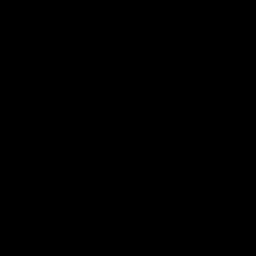

In [86]:
Image.open(df["mask_file"][37])

In [83]:
from PIL import Image
import numpy as np


def check_mask(file):
    # Open the file
    image = Image.open(file)

    # Convert the image to an array
    image_array = np.array(image)

    # Check if there is a white pixel
    if np.any(image_array > 0):
        return 1
    else:
        return 0



In [82]:
df["check_mask"] = df["mask_file"].apply(check_mask)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch

np.random.seed(42)

# Generate 16 random indices
indices = np.random.randint(0, len(df), 16)

# Create a figure for the subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the indices
for i, index in enumerate(indices):
    # Read the image and mask
    image = Image.open(df.loc[index, "image_file"])
    mask = Image.open(df.loc[index, "mask_file"])

    # Create a subplot for the image and mask
    ax = axs[i // 4, i % 4]
    ax.imshow(image, cmap="gray")
    ax.imshow(mask, cmap="jet", alpha=0.5)  # Overlay the mask on the image
    ax.axis("off")
    
    mask_status = "Mask" if df.loc[index, "check_mask"] == 1 else "No mask"
    ax.set_title(f"Index: {index}\n{mask_status}")


plt.tight_layout()
plt.show()

In [ ]:
np.random.randint(0, len(df), 16)


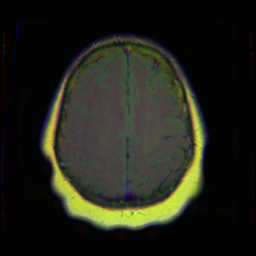

In [123]:
import albumentations as A


PATCH_SIZE = 128

transforms = A.Compose(
    [
        A.Resize(width=PATCH_SIZE, height=PATCH_SIZE, p=1.0),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.5),
        A.Transpose(p=0.5),
        A.ShiftScaleRotate(shift_limit=0.01, scale_limit=0.04, rotate_limit=0, p=0.25),
        A.Normalize(p=1.0),
        #A.pytorch.ToTensorV2(),
    ]
)

Image.open(df["image_file"][37])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


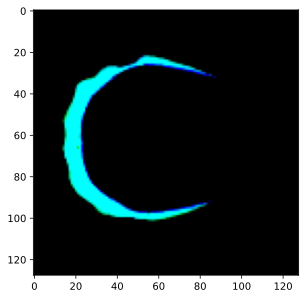

In [161]:
import cv2

image = cv2.imread(df["image_file"][37])

resized_image = transforms(image=image)["image"]


plt.imshow(resized_image)

In [148]:
def show_aug(inputs, nrows=1, ncols=1, norm=False):
    plt.figure(figsize=(10, 10))
    plt.subplots_adjust(wspace=0.0, hspace=0.0)
    i_ = 0

    if len(inputs) > 25:
        inputs = inputs[:25]

    for idx in range(len(inputs)):

        # normalization
        if norm:
            img = inputs[idx].numpy().transpose(1, 2, 0)
            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225]
            img = (img * std + mean).astype(np.float32)

        else:
            img = inputs[idx].numpy().astype(np.float32)
            img = img[0, :, :]

        plt.subplot(nrows, ncols, i_ + 1)
        plt.imshow(img)
        plt.axis("off")

        i_ += 1

    return plt.show()

In [152]:
resized_image.shape

(128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


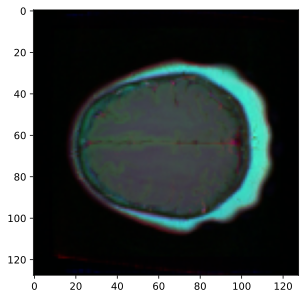

In [157]:
resized_image

img = resized_image
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
img = (img * std + mean).astype(np.float32)

plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

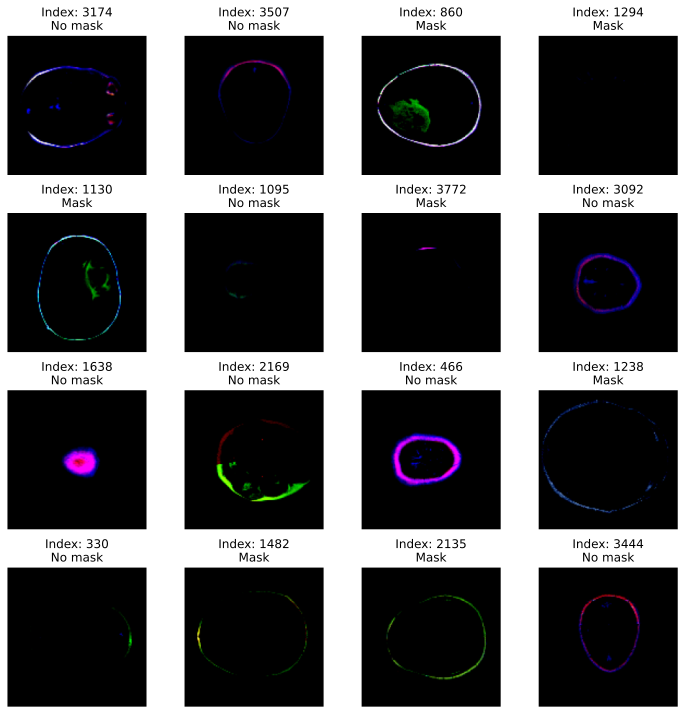

In [144]:
np.random.seed(42)

# Generate 16 random indices
indices = np.random.randint(0, len(df), 16)

# Create a figure for the subplots
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

# Loop over the indices
for i, index in enumerate(indices):
    # Read the image and mask
    image = Image.open(df.loc[index, "image_file"])
    # mask = Image.open(df.loc[index, "mask_file"])
    image = transforms(image=np.array(image))["image"]

    # Create a subplot for the image and mask
    ax = axs[i // 4, i % 4]

    ax.imshow(image)
    # ax.imshow(mask, cmap="jet", alpha=0.5)  # Overlay the mask on the image
    ax.axis("off")

    mask_status = "Mask" if df.loc[index, "check_mask"] == 1 else "No mask"
    ax.set_title(f"Index: {index}\n{mask_status}")


plt.tight_layout()
plt.show()

---

<a id='sec_manual_segmentation'></a>

## Manual segmentation

$\Rightarrow$ Describe the manual segmentation step


### Goals:
* Segment structures of interest using a tool  
* These structures you need to 
* If you find a dataset that comes with segmentation masks, you still need to demonstrate how to create such masks!

---

<a id='sec_automated_segmentation'></a>

## Automated segmentation

$\Rightarrow$ Describe how to segment the image in Python


### Goals:
* The segmentation must be performed in Python.
* Using an external library or tool (e.g. OpenCV) is permitted.
* Implement a function `segment(image, ...)` takes an image as input and creates a segmentation mask for the structure of interest.

---

<a id='sec_evaluation'></a>

## Evaluation

$\Rightarrow$ Describe the evaluation of your results


### Goals:
* Choose an evaluation method that can compare two binary segmentation masks and computes a numeric score that describes how well these masks match (use for example the Dice score)
* Hint: specify a function `evaluate(mask1, mask2)` that computes the evaluation score(s)
* Compute mean and standard deviation of the scores of the entire dataset

---

<a id='sec_discussion'></a>

## Discussion

$\Rightarrow$ Discuss your results and experiences briefly.




---

<a id='sec_references'></a>

## References

$\Rightarrow$ Add here references as URLs.

Also declare the usage of **generative AI** here!!




<br><br><br><br><br><br><br><br>

---

<a id='sec_hints'></a>

## Hints:
* Display your data if possible.
* An easy way to show 2D images is using Pillow:


In [ ]:
# Displayin an image with Pillow
path = "../data/images/kidney-cells.jpg"
path = "../data/images/histology-image.jpg"
image = PIL.Image.open(path)
display(image)                  

In [ ]:
# If you keep the data as a numpy array (for example when using
# the OpenCV interface), you can use matplotlib to display it.
path = "../data/images/ct-brain-slices.jpg"
image = cv.imread(path)
plt.imshow(image)
plt.axis("off");


In [ ]:
# For convenience, we also provide tools.display_image()
path = "../data/images/kidney-cells.jpg"
tools.display_image(path, scale=0.5)

There are many ways how to overlay an image with the mask. Here is one option:

In [ ]:
# Enforce a (3-channel) color image
path_image = "../data/images/neurons-cultured.jpg"
image = cv.imread(path_image, cv.IMREAD_COLOR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Mask image
path_mask = "../data/images/neurons-cultured-mask.png"
mask = cv.imread(path_mask, cv.IMREAD_GRAYSCALE)

# Create overlay (RGB)
overlay_color = [255, 0, 0]
overlay_alpha = 0.3
overlay = image.copy()
overlay[mask > 0] = overlay_color
overlay = cv.addWeighted(image, 1 - overlay_alpha, overlay, overlay_alpha, 0)

# Display the images next to each other using a convenience function
tools.show_image_chain((image, overlay), titles=("Input", "Overlay"))


In [ ]:
# We could also create contours around the mask and display them
overlay_color = [255, 255, 0]
line_width = 1
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
image_contours = image.copy()
cv.drawContours(image_contours, contours, -1, overlay_color, line_width)
tools.show_image_chain((image, image_contours), titles=("Input", "Contours"))

An advanced example: We can colorize the different contours with different colors.

Strategy:
- Use connected components to label the different regions using integers 
(every region has a different label)
- Assign a different color to different labels by encoding the label in 
the hue channel (HSV color space!)
- Extract contours from the mask (must be a binary image)
- Merge draw the contours with the colorized labels onto the original image

In [ ]:
# This will contain the result
image_contours = image.copy()

# Compute the "connected components" (= separate objects in the mask)
n_labels, labels = cv.connectedComponents(mask)

# Assign a different color to each label in the hue channel (HSV color space)
hue = np.uint8(150*labels/np.max(labels))
blank = 255*np.ones_like(hue)
labels = cv.merge([hue, blank, blank])

# Convert from HSV color space to RGB
labels = cv.cvtColor(labels, cv.COLOR_HSV2RGB)
# Set the background label (labels==0) to black
labels[labels==0] = 0

# Create a mask of the contours
line_width = 1
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
mask_contours = cv.drawContours(np.zeros_like(mask), contours, -1, 255, line_width)

# Assign the colored labels only along the contours
image_contours[mask_contours>0] = labels[mask_contours>0]

# Display the result
tools.show_image_chain((image, image_contours), titles=("Input", "Labeled contours"))

### How to convert a Jupyter notebook into a PDF:

- Don't forget to save this notebook before converting!
- Install nbconvert: `pip install nbconvert`
- Convert the notebook into a HTML file: `jupyter nbconvert --to html main.ipynb`  
  The file will be saved in the same folder as this Jupyter notebook
- Open the HTML in a browser and print (or save) it as a PDF
- Recommendation: If you use the Opera browser, you can save the HTML as single-page PDF. This looks the best!

In [ ]:
# Make sure you save this notebook, otherwise the HTML 
# output will not contain the latest version!!

# Make sure you have nbcovnert installed
!pip install nbconvert --quiet
# Save the notebook as HTML
!jupyter nbconvert --to html main.ipynb
